In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
from matplotlib import pyplot

In [3]:
from PIL import Image
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '../input/characterrecognitionfromnumberplate/Training Data',
    target_size=(42, 42),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

Found 24530 images belonging to 36 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
    '../input/characterrecognitionfromnumberplate/Training Data',
    target_size=(42, 42),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 6104 images belonging to 36 classes.


In [6]:
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model
import tensorflow as tf

In [7]:
model = keras.Sequential([
        
        # Add first Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                      padding='same', input_shape=(42,42,3)),
        # Add a second Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        # Add a Max pooling layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout layer
        layers.Dropout(0.25),
    
        layers.BatchNormalization(),
        # Add third Convolutional Layer
        layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding = 'same'),
        # Add Fourth Convolutional Layer
        layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
        # Add a Max pooling layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout Layer
        layers.Dropout(0.25),

        layers.BatchNormalization(),
        # Add Fifth Convolutional Layer
        layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding = 'same'),
        # Add a sixth Convolutional Layer
        layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
        # Add a Max Pooling Layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout Layer
        layers.Dropout(0.25),

        layers.BatchNormalization(),
        # Add a Flatten Layer
        layers.Flatten(),
        # Add a Dense layer Layer
        layers.Dense(256, activation = 'relu'),
        layers.Dense(512, activation = 'relu'),
        # Add a Dropout Layer
        layers.Dropout(0.5),
        # Add the Output Dense Layer
        layers.Dense(36, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 42, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 20, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        3

In [10]:
from keras.utils.vis_utils import plot_model

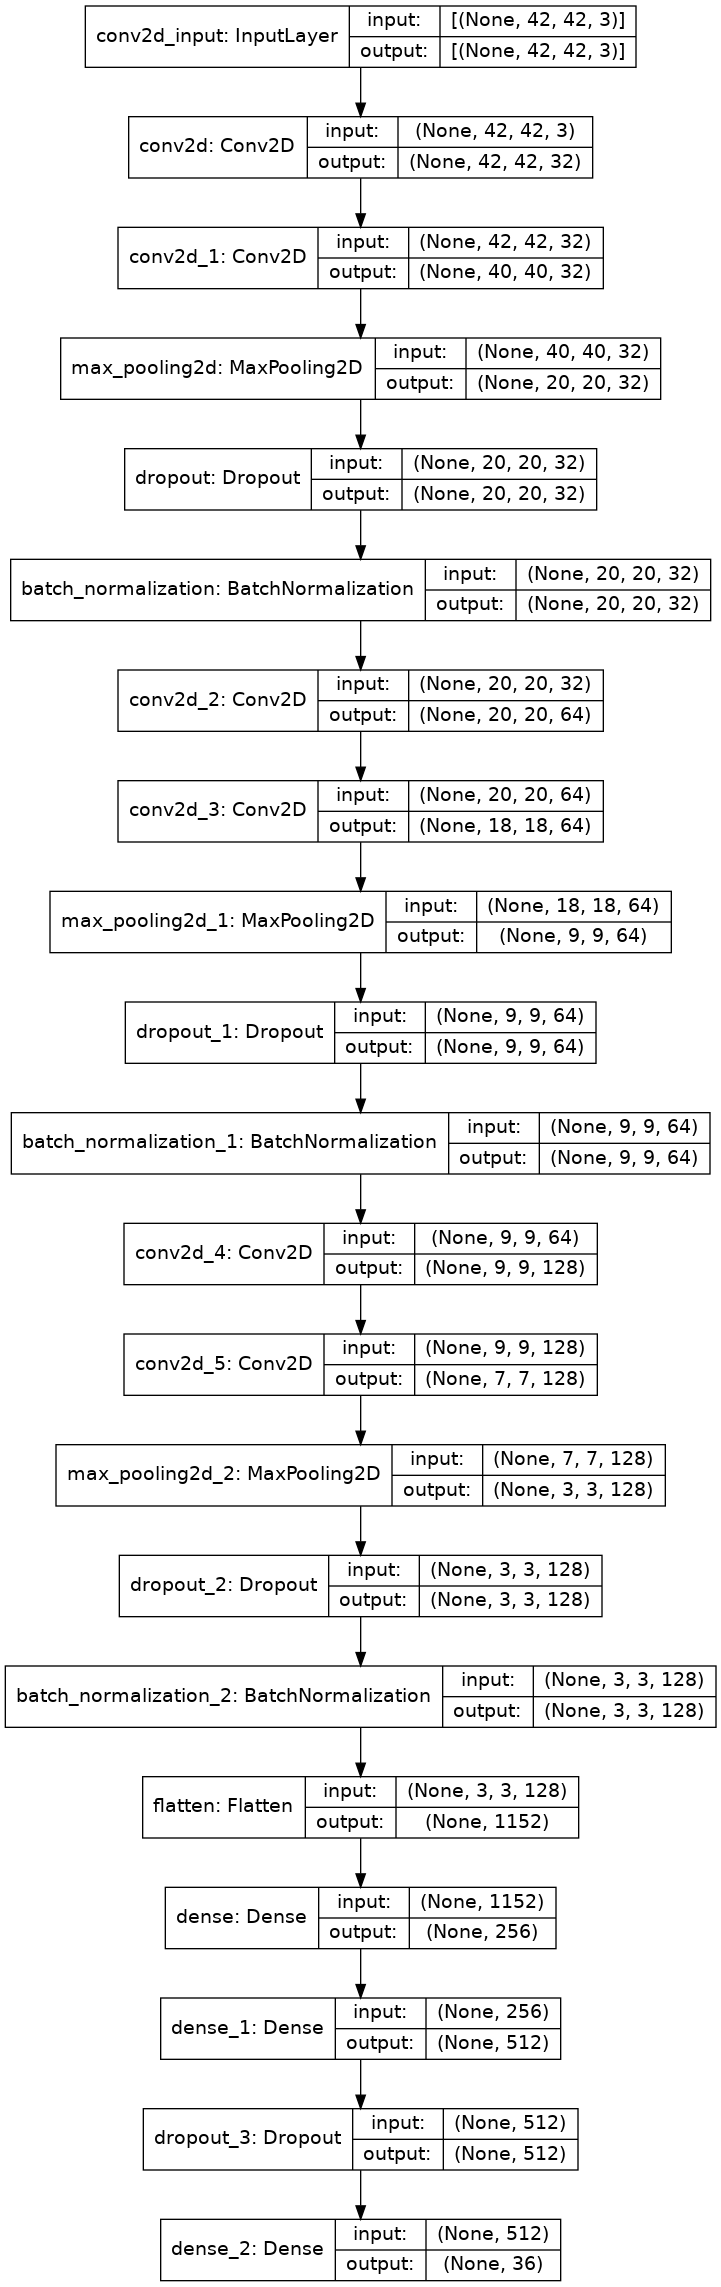

In [11]:
keras.utils.plot_model(model,  show_shapes=True)

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [13]:
model_checkpoint = ModelCheckpoint("./model/", save_best_only=True, verbose=1, monitor='val_accuracy', mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, verbose=1, mode='auto')

In [14]:
with tf.device('/GPU:0'):
    history=model.fit(x=train_generator, validation_data=validation_generator, epochs=35,shuffle= True,callbacks=[model_checkpoint, reduce_lr])

Epoch 1/35
767/767 [==============================] - 246s 314ms/step - loss: 1.2469 - accuracy: 0.6029 - val_loss: 0.1819 - val_accuracy: 0.9461

Epoch 00001: val_accuracy improved from -inf to 0.94610, saving model to ./model/
Epoch 2/35
767/767 [==============================] - 70s 91ms/step - loss: 0.2081 - accuracy: 0.9374 - val_loss: 0.1025 - val_accuracy: 0.9725

Epoch 00002: val_accuracy improved from 0.94610 to 0.97248, saving model to ./model/
Epoch 3/35
767/767 [==============================] - 69s 90ms/step - loss: 0.1078 - accuracy: 0.9671 - val_loss: 0.0841 - val_accuracy: 0.9771

Epoch 00003: val_accuracy improved from 0.97248 to 0.97706, saving model to ./model/
Epoch 4/35
767/767 [==============================] - 70s 92ms/step - loss: 0.1058 - accuracy: 0.9707 - val_loss: 0.0846 - val_accuracy: 0.9810

Epoch 00004: val_accuracy improved from 0.97706 to 0.98100, saving model to ./model/
Epoch 5/35
767/767 [==============================] - 71s 93ms/step - loss: 0.077

In [15]:
from matplotlib import pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


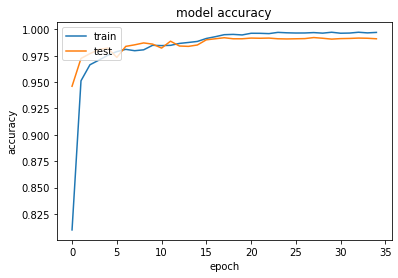

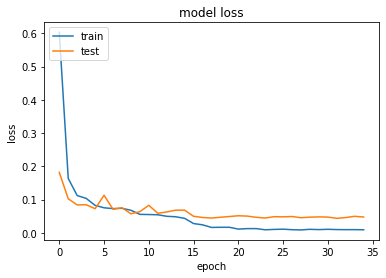

In [16]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.save("./model_1.h5")

In [18]:
model.save_weights("./weight_1.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
test_set = test_datagen.flow_from_directory('../input/characterrecognitionfromnumberplate/Testing Data',
                                            target_size = (42,42),
                                            batch_size = 32,
                                            class_mode='categorical',
                                                    shuffle=False)

Found 396 images belonging to 36 classes.


In [21]:
pred=model.predict(test_set)

In [22]:
pred

array([[4.6202629e-05, 1.2385879e-05, 2.5927511e-05, ..., 1.2927563e-07,
        5.3581726e-07, 1.3586456e-06],
       [2.9267801e-07, 8.2161185e-09, 8.8074707e-08, ..., 6.9928875e-11,
        1.6508565e-10, 2.5826785e-10],
       [1.4983908e-05, 1.5352157e-06, 1.2832321e-04, ..., 6.2050766e-08,
        9.0297574e-09, 1.2638497e-04],
       ...,
       [8.4150182e-05, 9.8756707e-01, 8.2178034e-05, ..., 3.8036728e-08,
        1.1732512e-06, 4.7334318e-08],
       [8.4150182e-05, 9.8756707e-01, 8.2178034e-05, ..., 3.8036728e-08,
        1.1732512e-06, 4.7334318e-08],
       [9.0109468e-05, 9.8670655e-01, 8.5016909e-05, ..., 4.0750827e-08,
        1.3111451e-06, 5.4886041e-08]], dtype=float32)

In [23]:
data_class=train_generator.class_indices

In [24]:
data_class

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'class_A': 10,
 'class_B': 11,
 'class_C': 12,
 'class_D': 13,
 'class_E': 14,
 'class_F': 15,
 'class_G': 16,
 'class_H': 17,
 'class_I': 18,
 'class_J': 19,
 'class_K': 20,
 'class_L': 21,
 'class_M': 22,
 'class_N': 23,
 'class_O': 24,
 'class_P': 25,
 'class_Q': 26,
 'class_R': 27,
 'class_S': 28,
 'class_T': 29,
 'class_U': 30,
 'class_V': 31,
 'class_W': 32,
 'class_X': 33,
 'class_Y': 34,
 'class_Z': 35}

In [25]:
test_set

In [26]:
img= cv2.imread("../input/characterrecognitionfromnumberplate/Testing Data/6/class_6_21.jpg")

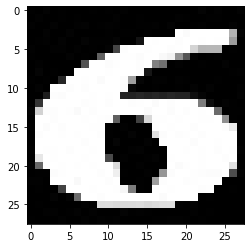

In [27]:
plt.imshow(img)

In [28]:
img= cv2.resize(img,(42,42))
test_image = np.expand_dims(img, axis = 0)

In [29]:
pred= model.predict(test_image)

In [30]:
pred

array([[8.4150262e-05, 9.8756707e-01, 8.2178034e-05, 1.0481527e-03,
        2.5064833e-04, 9.3570229e-04, 3.2285455e-04, 5.1054228e-03,
        2.8765888e-03, 1.5393124e-04, 5.0164482e-07, 5.5611679e-08,
        7.3256629e-08, 9.6859765e-07, 2.4868197e-07, 1.4361466e-06,
        2.8519347e-08, 1.7234942e-06, 1.1024310e-03, 3.0758145e-04,
        5.3703911e-06, 1.6531561e-05, 2.6861831e-06, 9.4201987e-08,
        4.6182666e-07, 2.6160055e-07, 5.3416795e-08, 1.4978566e-07,
        4.8091806e-09, 1.0472300e-04, 6.7932920e-06, 1.6523994e-05,
        3.3560032e-06, 3.8036728e-08, 1.1732491e-06, 4.7334410e-08]],
      dtype=float32)

In [31]:
dataClass= {0:"0",1:"1",2:'2',3:"3",4:'4',5:'5',6:"6",7:"7",8:"8",9:"9",10:"A",11:"B",12:'C',13:"D",14:"E",15:"F",16:'G',17:"H",18:"I",
            19:'J',20:'K',21:"L",22:"M",23:"N",24:"O",25:"P",26:"Q",27:"R",28:"S",29:"T",30:"U",31:"V",32:"W",33:"",34:"Y",35:"Z"}

In [32]:
dataClass

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: '',
 34: 'Y',
 35: 'Z'}

In [33]:
output = pd.DataFrame(pred)
# Get the index of the max probability from the output Data frame
maxIndex = list(output.idxmax(axis=1))
# Print the max index
print("Max index: ", maxIndex)

Max index:  [1]


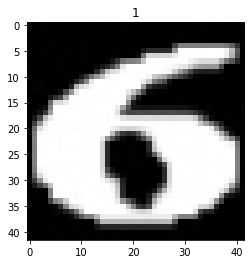

In [34]:
plt.title(dataClass.get(maxIndex[0], "error"))
plt.imshow(img)
plt.show()
